In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import sem
from scipy.stats import norm
import matplotlib.mlab as mlab

In [2]:
#Reads data file
wine_data = pd.read_csv('../data/rawdata/wine-reviews/winemag-data-130k-v2.csv')

In [3]:
#Drop wines with missing country, price or points rating
clean_data = wine_data.dropna(subset=['country', 'price', 'points'])

In [4]:
#There are over 700 varieties of wine in the file
#we define a dictionary to sort them into 9 main varieties
Wine_types={'Bold Red': ['Malbec', 'Syrah', 'Shiraz', 'Mourvedre', 'Pinotage', 'Petite Sirah', 'Touriga Nacional', 'Cabernet Sauvignon', 'Bordeaux Blend', 'Meritage'],
          'Medium Red': ['Meriot', 'Sangiovese', 'Zinfandel','Cabernet Franc', 'Tempranillo', 'Nebbiolo', 'Barbera', 'Cotes du Rhone Blend'],
          'Light Red':[ 'Pinot Noir', 'Grenache', 'Gamay', 'St. Laurent', 'Carignan', 'Counoise'],
          'Rich White': ['Chardonnay', 'Semillon','Viognier', 'Marsanne', 'Roussanne'],
          'Light White': ['Sauvignon Blanc', 'Albarino', 'Pitot Blanc', 'Vermentino', 'Melon de Bourgogne', 'Gargenega', 'Trebbiano', 'Pinot Gris', 'Pinot Grigio'],
          'Sweet White': ['Moscato', 'Riesling', 'Chenin Blanc', 'Gewurztraminer', 'Late Harvest Whites', 'Alascian Pinot Gris'],
          'Rose': ['Provencal Rose', 'White Zinfandel', 'Loire Valley Rose', 'Pinot Noir Rose', 'Syrah Rose', 'Garnache Rosado', 'Bandol Rose', 'Tempranilio Rose', 'Saignee Method Rose'],
          'Sparkling': ['Champagne', 'Prosecco', 'Cremant', 'Cava', 'Metodo Classico', 'Sparkling Wine', 'Sparkling Rose'],
          'Dessert': ['Port', 'Sherry', 'Maderia', 'Vin Santo', 'Muscat', 'PX', 'Pedro Ximenez']
          }
Wine_types.keys()

dict_keys(['Bold Red', 'Medium Red', 'Light Red', 'Rich White', 'Light White', 'Sweet White', 'Rose', 'Sparkling', 'Dessert'])

In [5]:
# This loop uses the dictionary to reclasify wine varieties 
df_variety=pd.DataFrame()
for x in Wine_types.keys():
   wt=pd.DataFrame([])
   for y in range(len(Wine_types[x])):
       #print('type=',x,'subtype=',Wine_types[x][y])
       wt=wt.append(clean_data[clean_data.variety.str.contains(Wine_types[x][y],na=False)])
       wt.head()
   wt.variety=x
   df_variety=df_variety.append(wt)

#df_variety.groupby('variety')['price'].apply(lambda x: x.count())

# How are taster ratings distributed?

#### Lets create a histogram to visualize the distribution of ratings

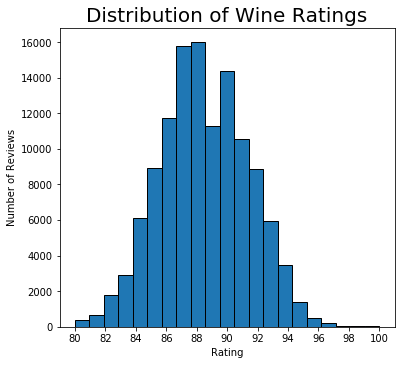

In [6]:
# Plot histogram
plt.figure(figsize=(6,5.5))
x = clean_data['points']
num_bins = 21
n, bins, patches = plt.hist(x, num_bins, edgecolor='k',histtype='bar')
plt.xticks(range(80,101,2))
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')
plt.title('Distribution of Wine Ratings',fontsize=20)
#plt.savefig("../reports/images/Distribution_of_Wine_Ratings.png",bbox_inches="tight")
plt.show()

#### Ratings seem to follow a normal distribution, lets fit our data using that distribution and see how well it fits.

C:\Users\alaq3\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  import sys


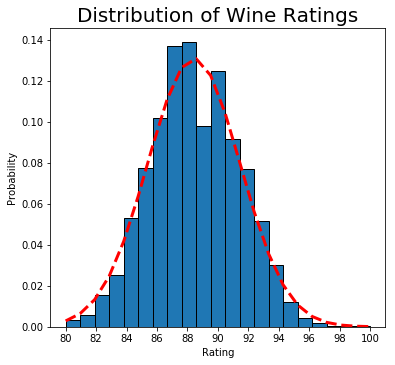

In [7]:
# Plot probability distribution for taster ratings
plt.figure(figsize=(6,5.5))
x = clean_data['points']
num_bins = 21
(mu, sigma) = norm.fit(x)
n, bins, patches = plt.hist(x, num_bins, density=1, edgecolor='k',histtype='bar')
y = mlab.normpdf( bins, mu, sigma)
l = plt.plot(bins, y, 'r--', linewidth=3)
plt.xticks(range(80,101,2))
plt.xlabel('Rating')
plt.ylabel('Probability')
plt.title('Distribution of Wine Ratings',fontsize=20)
#plt.savefig("../reports/images/Fit_Distribution_of_Wine_Ratings.png",bbox_inches="tight")
plt.show()

In [8]:
pd.DataFrame({'Mean':[mu],'StdDev':[sigma],'Mean - StdDev':[mu - sigma],'Mean + StdDev':[mu + sigma]})

,Mean,StdDev,Mean - StdDev,Mean + StdDev
0,88.421723,3.044929,85.376793,91.466652


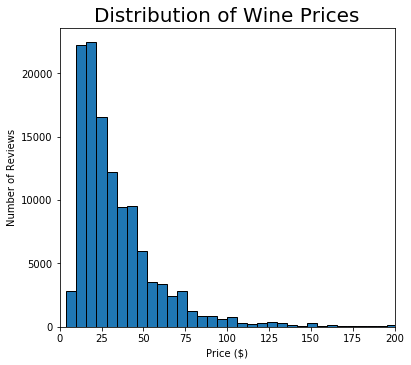

In [24]:
# Lets plot a histogram for the distribution of prices
plt.figure(figsize=(6,5.5))
x = clean_data['price']
num_bins = 550
n, bins, patches = plt.hist(x, num_bins, edgecolor='k', histtype='bar',align='mid')
plt.xlabel('Price ($)')
plt.ylabel('Number of Reviews')
plt.title('Distribution of Wine Prices',fontsize=20)
#plt.savefig("../reports/images/Distribution_of_Wine_Prices.png",bbox_inches="tight")
plt.xlim(0,200)
plt.show()

### Wine prices do not follow a normal distribution. The histogram shows fat tails in the distribution. For this reason when prices are analyze, we should consider price median instead of the mean. 

# How do average ratings compare among each taster?

#### Lets group by tasters and take the average of ratings

In [10]:
taster_reviews = clean_data.groupby('taster_name').mean()
taster_reviews = taster_reviews.reset_index()
taster_reviews = taster_reviews.sort_values(by='points')

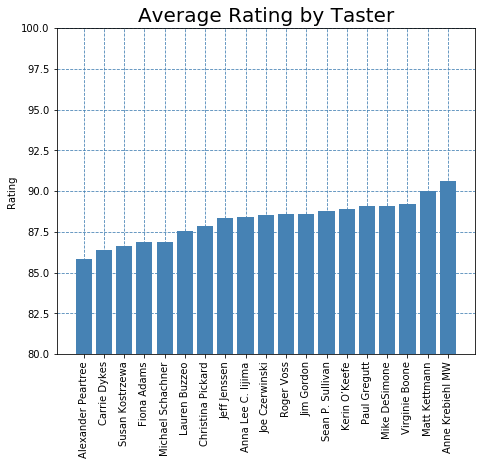

In [11]:
# Plot the average rating for each taster
plt.figure(figsize=(7.5,6))
plt.bar(taster_reviews.taster_name,taster_reviews.points,color='steelblue')
plt.xticks(rotation=90)
plt.ylabel('Rating')
plt.title('Average Rating by Taster',fontsize=20)
plt.ylim(80,100)
plt.grid(linestyle='--',color='steelblue')
#plt.savefig("../reports/images/Avg_Rating_Taster.png",bbox_inches="tight")
plt.show()

In [12]:
#Create a dataframe with min, max ratings
pd.DataFrame({'Min':[taster_reviews.points.min()],'Max':[taster_reviews.points.max()]})

,Min,Max
0,85.854722,90.61257


#### We do not see a reviewer diverting significantly from the mean. The average rating for all tasters falls inside one standard deviation from the mean.
#### This observation is also supported by the boxplot below, each reviewer average is withint the error bars of the other reviwers.

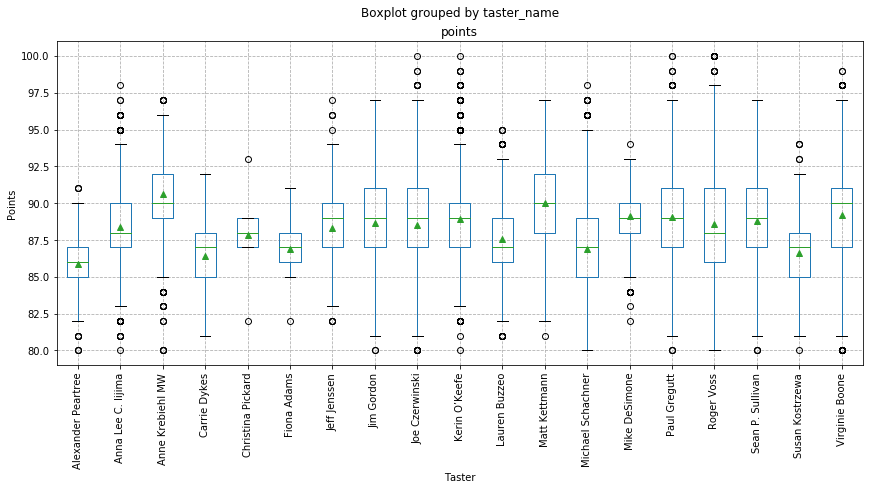

In [13]:
# This boxplot shows there are no outliers. No reviewer rates wine significantly different that the others.
clean_data.boxplot("points", by="taster_name", figsize=(14, 6), showmeans=True)
plt.grid(linestyle='--')
plt.xlabel('Taster')
plt.ylabel('Points')
plt.xticks(rotation=90)
#plt.savefig("../reports/images/11_Avg_Rating_Boxplot_.png",bbox_inches="tight")
plt.show()

# Do tasters show a preference to review certain wine varieties? 

In [14]:
# Groping by tasters and variety
taster_variety = df_variety.groupby(['taster_name','variety'])['points'].count()
taster_variety = taster_variety.reset_index()

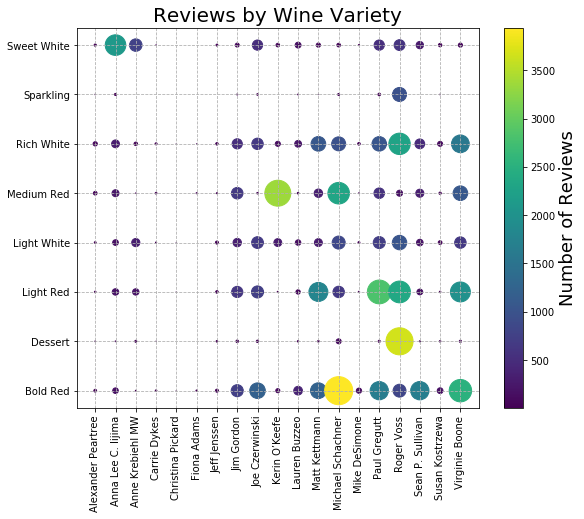

In [22]:
# Create a scatter plot of variety and tasters
plt.figure(figsize=(9,7))
plt.scatter(taster_variety.taster_name,taster_variety.variety,s=taster_variety.points*.2,c=taster_variety.points)
plt.xticks(rotation=90)
plt.grid(linestyle='--')
cbar=plt.colorbar()
cbar.set_label('Number of Reviews', size=18)
plt.title('Reviews by Wine Variety',fontsize=20)
#plt.savefig("../reports/images/Review_by_Wine_Variety.png",bbox_inches="tight")
plt.show()

### We do not see specialization in variety. Tasters tend to review wines across several varieties and although not in equal numbers.

# Do tasters show a preference to review wines from specific countries?

In [16]:
# Groping by tasters and country
taster_country = df_variety.groupby(['taster_name','country'])['points'].count()
taster_country = taster_country.reset_index()

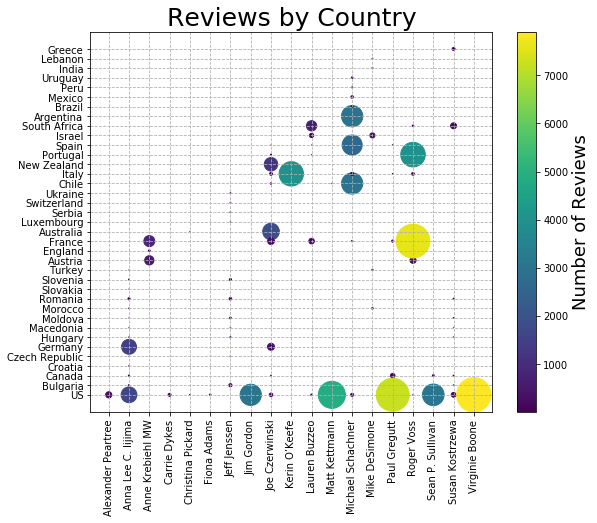

In [17]:
# Create a scatter plot of country and tasters
plt.figure(figsize=(9,7))
plt.scatter(taster_country.taster_name,taster_country.country,s=taster_country.points*.15,c=taster_country.points)
plt.xticks(rotation=90)
plt.grid(linestyle='--')
cbar=plt.colorbar()
cbar.set_label('Number of Reviews', size=18)
plt.title('Reviews by Country',fontsize=20)
#plt.savefig("../reports/images/Reviews_by_Country.png",bbox_inches="tight")
plt.show()

### We do see that tasters tend to favor reviewing wines from specific countries. For example, Virginie Boone and Kerin O'keefe have both reviwed wine from one country and Roger Voss has mode over 10,000 reviews the vast majority for wines from France and Portugal.

# Relation Between Price and Rating

In [18]:
# Let calculate price median and the standard error for rating point
clean_data_med = clean_data.groupby('points').median()
clean_data_med = clean_data_med.reset_index()
clean_data_err = clean_data.groupby('points').sem()
clean_data_err = clean_data_err.reset_index()

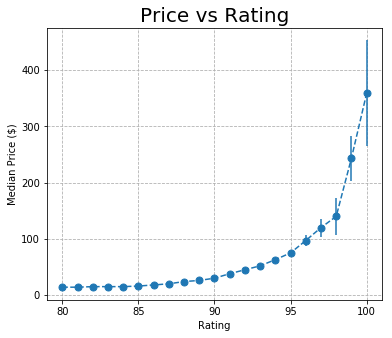

In [19]:
#Plot price vs rating
plt.figure(figsize=(6,5))
plt.errorbar(clean_data_med.points, clean_data_med.price, clean_data_err.price, fmt="o--", markersize=7)
plt.grid(linestyle='--')
plt.xticks(range(80,101,5))
plt.xlabel('Rating')
plt.ylabel('Median Price ($)')
plt.title('Price vs Rating',fontsize=20)
#plt.savefig("../reports/images/Price_vs_Rating.png",bbox_inches="tight")
plt.show()

### The plot above show that wine prices are proportional to ratings. The relationship is not linear, instead prices increase at a higher rate as rating increases.

In [20]:
# Let do a similar analysis but at a ountry level.
# Lets pick data for 3 countries with significant number of wines
us = clean_data.loc[clean_data['country']=='US',['points','price']]
france = clean_data.loc[clean_data['country']=='France',['points','price']]
italy = clean_data.loc[clean_data['country']=='Italy',['points','price']]

# Calculate median and standard error for each of the 3 counties data
us_med = us.groupby('points').median()
us_med = us_med.reset_index()
us_err = us.groupby('points').sem()
us_err = us_err.reset_index()

france_med = france.groupby('points').median()
france_med = france_med.reset_index()
france_err = france.groupby('points').sem()
france_err = france_err.reset_index()

italy_med = italy.groupby('points').median()
italy_med = italy_med.reset_index()
italy_err = italy.groupby('points').sem()
italy_err = italy_err.reset_index()

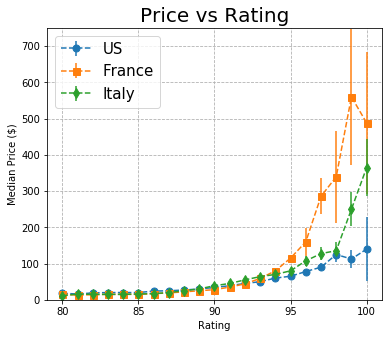

In [21]:
plt.figure(figsize=(6,5))
plt.errorbar(us_med.points, us_med.price, us_err.price, fmt="--o", label='US', markersize=7)
plt.errorbar(france_med.points, france_med.price, france_err.price, fmt="s--", label='France', markersize=7)
plt.errorbar(italy_med.points, italy_med.price,italy_err.price, fmt="d--", label='Italy', markersize=7)
plt.grid(linestyle='--')
plt.ylim(0,750)
plt.xticks(range(80,101,5))
plt.xlabel('Rating')
plt.ylabel('Median Price ($)')
plt.title('Price vs Rating',fontsize=20)
plt.legend(loc='upper left',prop={'size':15})
#plt.savefig("../reports/images/Price_vs_Rating_by_Country.png",bbox_inches="tight")
plt.show()

### As expected we see the same relation between price and points, however the rate of increase is different for each country. In this case, the price of French wine becomes significantly more expensive than US and Italian wines